# Lattice-Scattering Mobility

The lattice-scattering-limited mobility is defined by the power-law relation  
$$
\mu_{\text{lat}}(T)
= 
\mu_{\text{lat}}(T_{\text{ref}})
\left(
  \frac{T}
       {T_{\text{ref}}
}\right)^{-\alpha_{\text{lat}}}.
$$
Here $T$ is temperature, $T_{\text{ref}}$ is a chosen reference temperature (usually $300\ \text{K}$), and $\alpha_{\text{lat}}$ is an exponent associated with acoustic-phonon scattering (typically $3/2$).

## Physical Meaning

Lattice scattering arises from thermally excited lattice vibrations (phonons).  
As temperature increases:

- phonon population increases,  
- carrier momentum-relaxation time decreases,  
- mobility decreases.

The model above captures this trend by enforcing a negative power law in temperature.

## Typical Values

- $T_{\text{ref}} = 300\ \text{K}$  
- $\alpha_{\text{lat}} \approx 3/2$ for acoustic-phonon deformation-potential scattering  
- $\mu_{\text{lat}}(300\ \text{K})$ is a material parameter 
  - electrons in Si: $\sim 1500\ \mathrm{cm}^2/\mathrm{(V \cdot s)}$
  - holes in Si: $\sim 450\ \mathrm{cm}^2/\mathrm{(V \cdot s)}$

## Usage Notes

- This is a **phenomenological** model appropriate for undergraduate and early-graduate semiconductor physics.  
- The exponent $\alpha_{\text{lat}}$ may be tuned to fit measured data for specific materials or temperature ranges.  
- When combined with impurity scattering via Matthiessen’s rule, the total mobility becomes  
  $$\frac{1}{\mu_{\text{tot}}}
    = \frac{1}{\mu_{\text{lat}}}
    + \frac{1}{\mu_{\text{imp}}}.$$



In [1]:
from __future__ import annotations
import numpy as np
from sempy import ConstantsSI
from typing import Union
from dataclasses import dataclass, asdict
ArrayLike = Union[float, np.ndarray]

@dataclass
class ParametersBase:
  @property
  def kwargs(self):
    return asdict(self)

@dataclass
class LatticeMobilityParameters(ParametersBase):
    T_ref: float       # reference temperature
    mu_ref: float      # μ_lat at T_ref (cm^2/Vs)
    alpha: float = 1.5 # acoustic phonon exponent

def lattice_scattering_mobility(
    T: ArrayLike,
    T_ref: float,
    mu_ref: float,
    alpha: float = 3.0 / 2.0,
) -> np.ndarray:
  r"""
  Compute the lattice-scattering-limited mobility.

  This model assumes acoustic-phonon scattering, for which the
  mobility follows a power-law temperature dependence:

  .. math::

      \mu_{\mathrm{lat}}(T)
      = \mu_{\mathrm{lat}}(T_{\mathrm{ref}})
        \left( \frac{T}{T_{\mathrm{ref}}} \right)^{-\alpha_{\mathrm{lat}}}


    Parameters
    ----------
    T : float or ndarray
        Temperature(s) in Kelvin.
    T_ref : float
        Reference temperature (K) where mu_lattice_ref is defined.
    mu_ref : float
        Lattice-limited mobility at T_ref (units: cm^2/(V*s)).
    alpha : float, optional
        Temperature exponent for acoustic-phonon scattering.
        Typical value is 1.5.

    Returns
    -------
    ndarray
        Lattice-limited mobility mu_lat(T) in cm^2/(V*s).
  """
  T = np.asarray(T, dtype=float)
  return mu_ref * (T / T_ref) ** (-alpha)


In [2]:
T = np.linspace(150, 600, 200)
si_lattice_mobility_parameters = LatticeMobilityParameters(
  T_ref = 300.0,
  mu_ref = 1500.,
  alpha = 1.5
)
print(si_lattice_mobility_parameters.kwargs)

T_vals = np.array([200, 300, 400, 600])   # Kelvin
mu0 = 1500.0                              # cm^2/(V*s) at T_ref = 300 K

mu_vals = lattice_scattering_mobility(
    T=T_vals,
    **si_lattice_mobility_parameters.kwargs
)

print(mu_vals)


{'T_ref': 300.0, 'mu_ref': 1500.0, 'alpha': 1.5}
[2755.67596063 1500.          974.27857926  530.33008589]


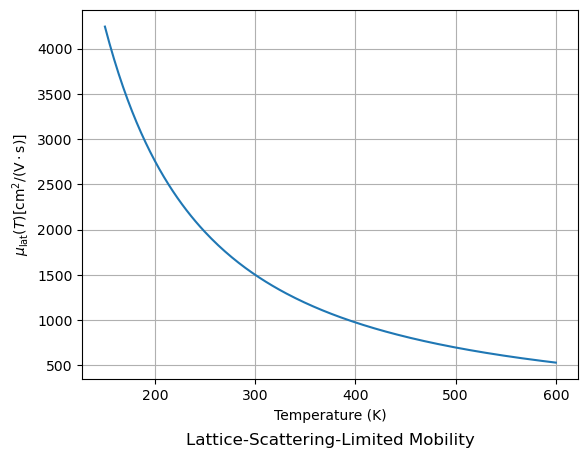

In [3]:
import matplotlib.pyplot as plt


mu_lattice = lattice_scattering_mobility(
  T=T, 
  **si_lattice_mobility_parameters.kwargs
)
plt.plot(T, mu_lattice)
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\mu_{\text{lat}}(T) [\mathrm{cm^2/(V \cdot s)}]$")
plt.title("Lattice-Scattering-Limited Mobility",y=-.2)
plt.grid(True)
plt.show()


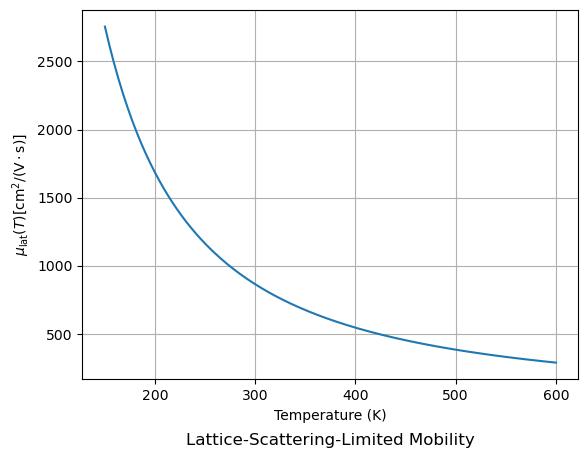

In [4]:
from sempy import LatticeMobilityParameters
from sempy import lattice_scattering_mobility

T_array = np.linspace(200,900,200)
mu_lattice = lattice_scattering_mobility(
  T=T_array, 
  **si_lattice_mobility_parameters.kwargs
)
plt.plot(T, mu_lattice)
plt.xlabel("Temperature (K)")
plt.ylabel(r"$\mu_{\text{lat}}(T) [\mathrm{cm^2/(V \cdot s)}]$")
plt.title("Lattice-Scattering-Limited Mobility",y=-.2)
plt.grid(True)
plt.show()
